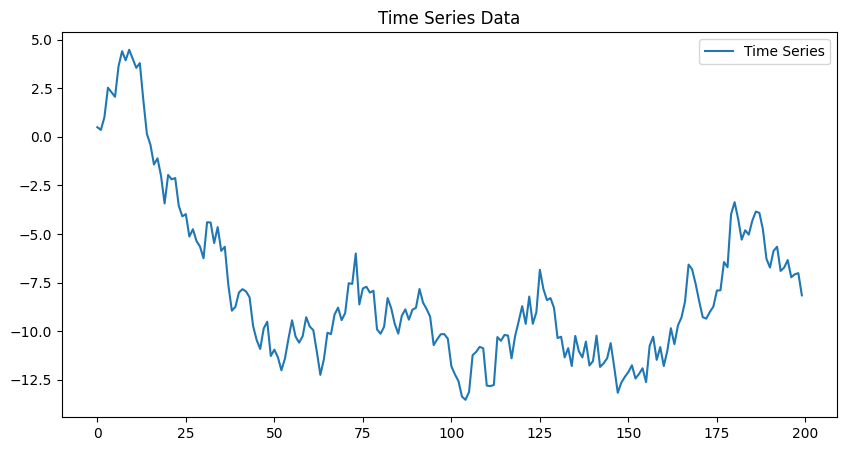

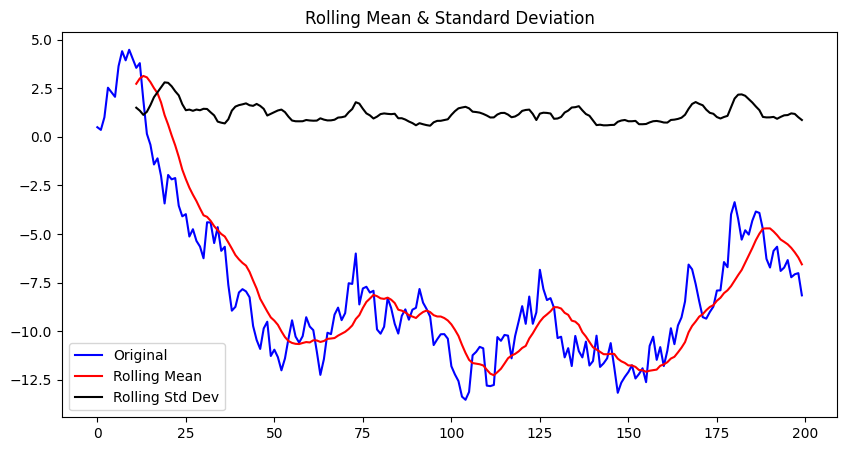

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.307285
p-value                          0.169629
#Lags Used                       0.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64

Results of KPSS Test:
Test Statistic           0.700140
p-value                  0.013533
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

# Generate a sample non-stationary time series (random walk)
np.random.seed(42)
n = 200
random_walk = np.cumsum(np.random.normal(0, 1, n))

# Convert to DataFrame
df = pd.DataFrame(random_walk, columns=['value'])

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(df['value'], label="Time Series")
plt.title("Time Series Data")
plt.legend()
plt.show()

# Function to check stationarity
def check_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='black')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Augmented Dickey-Fuller Test
    print("Results of Augmented Dickey-Fuller Test:")
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_results = pd.Series(adf_test[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_results[f'Critical Value ({key})'] = value
    print(adf_results)

    # KPSS Test
    print("\nResults of KPSS Test:")
    kpss_test = kpss(timeseries, regression='c', nlags="auto")
    kpss_results = pd.Series(kpss_test[:2], index=['Test Statistic', 'p-value'])
    for key, value in kpss_test[3].items():
        kpss_results[f'Critical Value ({key})'] = value
    print(kpss_results)

# Run the stationarity test
check_stationarity(df['value'])

